In [1]:
# import libraries
#!pip install turicreate
import numpy as np
import pandas as pd
#import turicreate
from sklearn.preprocessing import OneHotEncoder

In [2]:
# libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

# Strategic imports
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Machine learning Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, VotingClassifier

from tensorflow import keras
import tensorflow as tf

# imports to mute warnings
pd.options.display.max_rows=200
pd.set_option('mode.chained_assignment', None)

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=RuntimeWarning)

print("sns.__version__", sns.__version__)
#print("sklearn.__version__", sklearn.__version__)

sns.__version__ 0.11.1


In [3]:
train = pd.read_csv('../input/alc-datathon-2021/covid_mental_health_train.csv')
test = pd.read_csv('../input/alc-datathon-2021/covid_mental_health_test.csv')

In [4]:
print(len(train))

8610


In [5]:
# summary stats
train.describe()

,id,city,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,current_physical,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
count,8.610000e+03,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,7282.000000,8610.000000,...,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000
mean,1.072829e+09,3.424274,1.525784,46.088269,1.649826,1.939721,1.911498,1.619628,4.308981,1.956330,...,5.245412,4.046690,3.849361,2.706272,3.461208,4.031243,2.754704,3.697909,3.871893,0.180488
std,6.189227e+08,2.008436,0.499364,14.727426,1.118760,0.238016,0.284040,0.485506,2.653107,0.204372,...,1.872720,1.663155,1.873872,1.766552,1.829900,1.767684,1.753610,1.888003,2.048310,0.384616
min,3.652360e+05,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5.360256e+08,2.000000,1.000000,34.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,0.000000
50%,1.079098e+09,3.000000,2.000000,46.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,6.000000,4.000000,4.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,0.000000
75%,1.603533e+09,5.000000,2.000000,57.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,...,7.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,0.000000
max,2.147087e+09,7.000000,2.000000,89.000000,5.000000,2.000000,2.000000,2.000000,10.000000,2.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


In [6]:
train.columns.tolist()

['id',
 'city',
 'gender',
 'age',
 'job',
 'health_worker_self',
 'health_worker_family',
 'family_status',
 'income_group',
 'current_physical',
 'past_physical',
 'current_mental',
 'past_mental',
 'exercise',
 'healthy_diet',
 'healthy_sleep',
 'activity',
 'interaction_offline',
 'interaction_online',
 'preventive_behaviors',
 'optimism',
 'deterioration_economy',
 'deterioration_interact',
 'frustration',
 'covid_anxiety',
 'covid_sleepless',
 'difficulty_living',
 'difficulty_work',
 'depression']

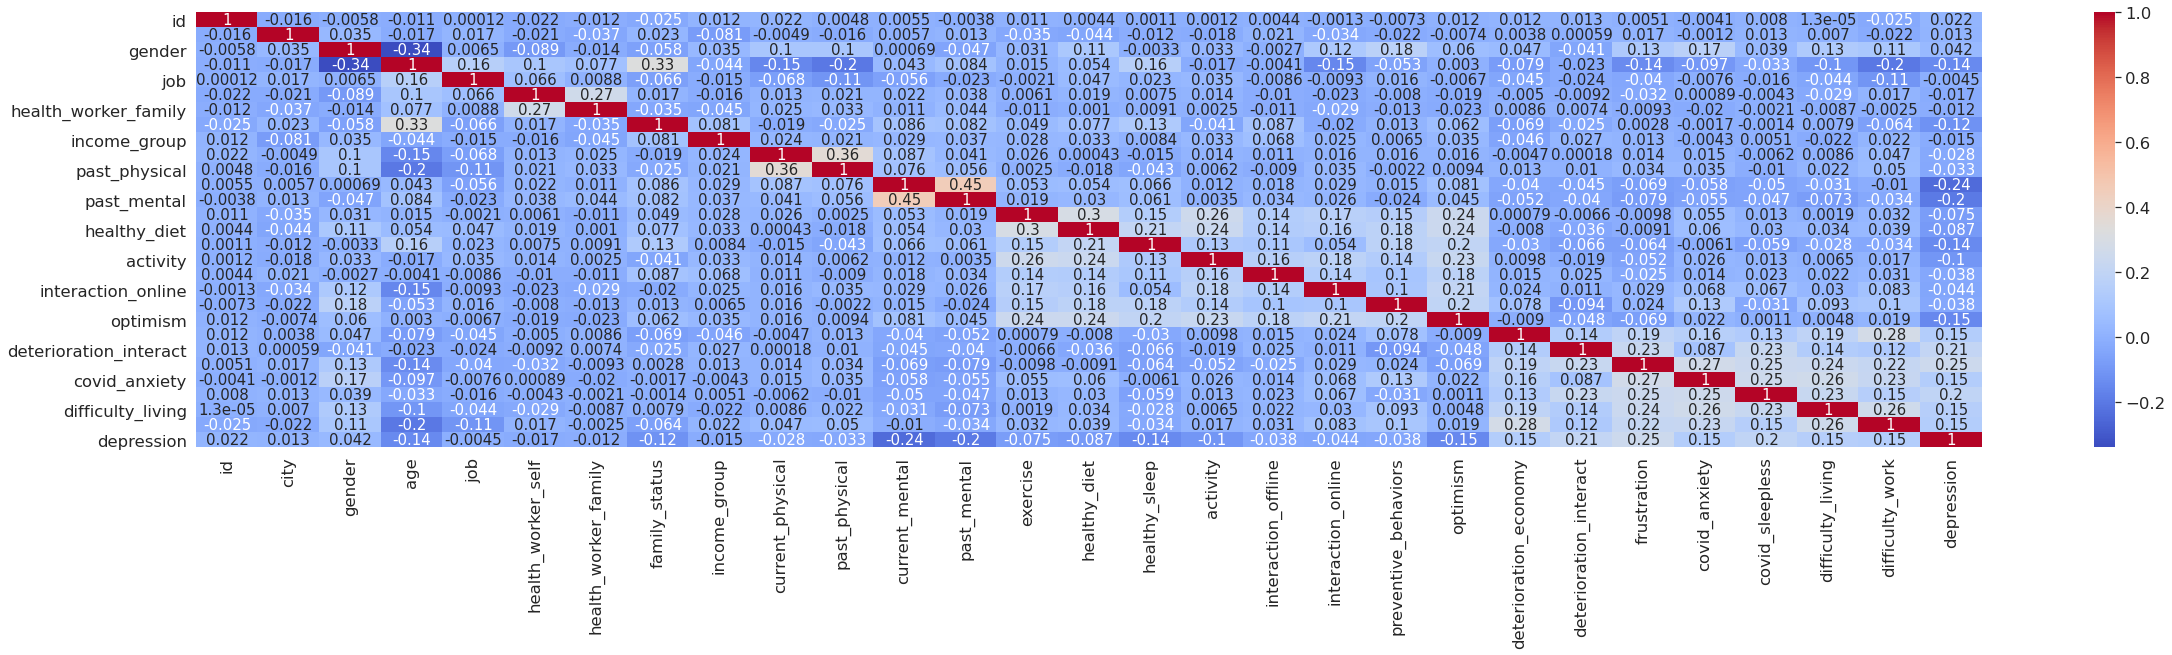

In [7]:
plt.figure(figsize=(40, 8))
sns.set(font_scale=1.5)
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

We see the correlation analysis of each feature with one another, we took the feature of current mental, past mental, past physical, current physical, optimism, deterioration interact, frustration, difficulty_work, difficulty_living, deteriation, healthy_sleep to be mostly co-related to the depression column

# Binning
From the keys file provided we are assuming the datas in the rang of 1-10/1-7 and also the continuous datas can be binned, we bin them in general into 3 category that we later have used for one hot encoding purppose

In [8]:
cat = pd.cut(train.income_group,bins=[1, 3, 6, 10],labels=['low','mid','high'])
train.insert(2, "income_group_binning", cat)
train.head()

,id,city,income_group_binning,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,NaN,1,65,4,2,2,1,1.0,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,low,1,68,1,2,2,2,3.0,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,low,1,68,4,2,2,2,3.0,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,mid,1,66,4,2,2,2,5.0,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,high,1,72,4,2,2,2,10.0,...,6,5,2,1,1,6,1,1,4,0


In [9]:
cat = pd.cut(train.income_group,bins=[1, 3, 6, 10],labels=['low','mid','high'])
test.insert(2, "income_group_binning", cat)
test.head()

,id,city,income_group_binning,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,NaN,2,45,2,2,2,2,2.0,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,low,2,32,2,2,1,2,2.0,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,low,2,34,1,2,2,1,3.0,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,mid,1,49,1,2,2,2,4.0,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,high,1,42,1,2,2,1,2.0,...,2,7,2,5,3,5,5,2,7,7


In [10]:
cat = pd.cut(train.exercise,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "exercise_binning", cat)
train.head()

,id,city,exercise_binning,income_group_binning,gender,age,job,health_worker_self,health_worker_family,family_status,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,mid,NaN,1,65,4,2,2,1,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,low,1,68,1,2,2,2,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,mid,low,1,68,4,2,2,2,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,mid,mid,1,66,4,2,2,2,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,high,high,1,72,4,2,2,2,...,6,5,2,1,1,6,1,1,4,0


In [11]:
cat = pd.cut(train.exercise,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "exercise_binning", cat)
test.head()

,id,city,exercise_binning,income_group_binning,gender,age,job,health_worker_self,health_worker_family,family_status,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,mid,NaN,2,45,2,2,2,2,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,low,2,32,2,2,1,2,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,mid,low,2,34,1,2,2,1,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,mid,mid,1,49,1,2,2,2,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,high,high,1,42,1,2,2,1,...,2,7,2,5,3,5,5,2,7,7


In [12]:
cat = pd.cut(train.healthy_diet,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2,"healthy_diet_binning", cat)
train.head()

,id,city,healthy_diet_binning,exercise_binning,income_group_binning,gender,age,job,health_worker_self,health_worker_family,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,low,mid,NaN,1,65,4,2,2,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,low,1,68,1,2,2,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,low,mid,low,1,68,4,2,2,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,mid,mid,mid,1,66,4,2,2,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,mid,high,high,1,72,4,2,2,...,6,5,2,1,1,6,1,1,4,0


In [13]:
cat = pd.cut(train.healthy_diet,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2,"healthy_diet_binning", cat)
test.head()

,id,city,healthy_diet_binning,exercise_binning,income_group_binning,gender,age,job,health_worker_self,health_worker_family,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,low,mid,NaN,2,45,2,2,2,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,low,2,32,2,2,1,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,low,mid,low,2,34,1,2,2,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,mid,mid,mid,1,49,1,2,2,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,mid,high,high,1,42,1,2,2,...,2,7,2,5,3,5,5,2,7,7


In [14]:
cat = pd.cut(train.healthy_sleep,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "healthy_sleep_binning", cat)
train.head()

,id,city,healthy_sleep_binning,healthy_diet_binning,exercise_binning,income_group_binning,gender,age,job,health_worker_self,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,mid,low,mid,NaN,1,65,4,2,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,mid,low,1,68,1,2,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,mid,low,mid,low,1,68,4,2,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,mid,mid,mid,mid,1,66,4,2,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,mid,mid,high,high,1,72,4,2,...,6,5,2,1,1,6,1,1,4,0


In [15]:
cat = pd.cut(train.healthy_sleep,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "healthy_sleep_binning", cat)
test.head()

,id,city,healthy_sleep_binning,healthy_diet_binning,exercise_binning,income_group_binning,gender,age,job,health_worker_self,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,mid,low,mid,NaN,2,45,2,2,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,mid,low,2,32,2,2,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,mid,low,mid,low,2,34,1,2,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,mid,mid,mid,mid,1,49,1,2,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,mid,mid,high,high,1,42,1,2,...,2,7,2,5,3,5,5,2,7,7


In [16]:
cat = pd.cut(train.activity,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "activity_binning", cat)
train.head()

,id,city,activity_binning,healthy_sleep_binning,healthy_diet_binning,exercise_binning,income_group_binning,gender,age,job,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,mid,mid,low,mid,NaN,1,65,4,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,mid,mid,low,1,68,1,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,mid,mid,low,mid,low,1,68,4,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,high,mid,mid,mid,mid,1,66,4,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,mid,mid,mid,high,high,1,72,4,...,6,5,2,1,1,6,1,1,4,0


In [17]:
cat = pd.cut(train.activity,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "activity_binning", cat)
test.head()

,id,city,activity_binning,healthy_sleep_binning,healthy_diet_binning,exercise_binning,income_group_binning,gender,age,job,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,mid,mid,low,mid,NaN,2,45,2,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,mid,mid,low,2,32,2,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,mid,mid,low,mid,low,2,34,1,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,high,mid,mid,mid,mid,1,49,1,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,mid,mid,mid,high,high,1,42,1,...,2,7,2,5,3,5,5,2,7,7


In [18]:
cat = pd.cut(train.interaction_offline,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "interaction_offline_binning", cat)
train.head()

,id,city,interaction_offline_binning,activity_binning,healthy_sleep_binning,healthy_diet_binning,exercise_binning,income_group_binning,gender,age,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,NaN,mid,mid,low,mid,NaN,1,65,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,mid,mid,mid,low,1,68,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,mid,mid,mid,low,mid,low,1,68,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,mid,high,mid,mid,mid,mid,1,66,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,mid,mid,mid,mid,high,high,1,72,...,6,5,2,1,1,6,1,1,4,0


In [19]:
cat = pd.cut(train.interaction_offline,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "interaction_offline_binning", cat)
test.head()

,id,city,interaction_offline_binning,activity_binning,healthy_sleep_binning,healthy_diet_binning,exercise_binning,income_group_binning,gender,age,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,NaN,mid,mid,low,mid,NaN,2,45,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,mid,mid,mid,low,2,32,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,mid,mid,mid,low,mid,low,2,34,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,mid,high,mid,mid,mid,mid,1,49,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,mid,mid,mid,mid,high,high,1,42,...,2,7,2,5,3,5,5,2,7,7


In [20]:
cat = pd.cut(train.interaction_online,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "interaction_online_binning", cat)
train.head()

,id,city,interaction_online_binning,interaction_offline_binning,activity_binning,healthy_sleep_binning,healthy_diet_binning,exercise_binning,income_group_binning,gender,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,mid,NaN,mid,mid,low,mid,NaN,1,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,mid,mid,mid,mid,low,1,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,high,mid,mid,mid,low,mid,low,1,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,NaN,mid,high,mid,mid,mid,mid,1,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,mid,mid,mid,mid,mid,high,high,1,...,6,5,2,1,1,6,1,1,4,0


In [21]:
cat = pd.cut(train.interaction_online,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "interaction_online_binning", cat)
test.head()

,id,city,interaction_online_binning,interaction_offline_binning,activity_binning,healthy_sleep_binning,healthy_diet_binning,exercise_binning,income_group_binning,gender,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,mid,NaN,mid,mid,low,mid,NaN,2,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,mid,mid,mid,mid,low,2,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,high,mid,mid,mid,low,mid,low,2,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,NaN,mid,high,mid,mid,mid,mid,1,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,mid,mid,mid,mid,mid,high,high,1,...,2,7,2,5,3,5,5,2,7,7


In [22]:
cat = pd.cut(train.preventive_behaviors,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "preventive_behaviors_binning", cat)
train.head()

,id,city,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,activity_binning,healthy_sleep_binning,healthy_diet_binning,exercise_binning,income_group_binning,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,mid,mid,NaN,mid,mid,low,mid,NaN,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,high,mid,mid,mid,mid,mid,mid,low,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,mid,high,mid,mid,mid,low,mid,low,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,mid,NaN,mid,high,mid,mid,mid,mid,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,mid,mid,mid,mid,mid,mid,high,high,...,6,5,2,1,1,6,1,1,4,0


In [23]:
cat = pd.cut(train.preventive_behaviors,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "preventive_behaviors_binning", cat)
test.head()

,id,city,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,activity_binning,healthy_sleep_binning,healthy_diet_binning,exercise_binning,income_group_binning,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,mid,mid,NaN,mid,mid,low,mid,NaN,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,high,mid,mid,mid,mid,mid,mid,low,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,mid,high,mid,mid,mid,low,mid,low,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,mid,NaN,mid,high,mid,mid,mid,mid,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,mid,mid,mid,mid,mid,mid,high,high,...,2,7,2,5,3,5,5,2,7,7


In [24]:
cat = pd.cut(train.optimism,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "optimism_binning", cat)
train.head()

,id,city,optimism_binning,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,activity_binning,healthy_sleep_binning,healthy_diet_binning,exercise_binning,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,mid,mid,mid,NaN,mid,mid,low,mid,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,high,mid,mid,mid,mid,mid,mid,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,mid,mid,high,mid,mid,mid,low,mid,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,high,mid,NaN,mid,high,mid,mid,mid,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,mid,mid,mid,mid,mid,mid,mid,high,...,6,5,2,1,1,6,1,1,4,0


In [25]:
cat = pd.cut(train.optimism,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "optimism_binning", cat)
test.head()

,id,city,optimism_binning,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,activity_binning,healthy_sleep_binning,healthy_diet_binning,exercise_binning,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,mid,mid,mid,NaN,mid,mid,low,mid,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,high,mid,mid,mid,mid,mid,mid,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,mid,mid,high,mid,mid,mid,low,mid,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,high,mid,NaN,mid,high,mid,mid,mid,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,mid,mid,mid,mid,mid,mid,mid,high,...,2,7,2,5,3,5,5,2,7,7


In [26]:
cat = pd.cut(train.deterioration_economy,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "deterioration_economy_binning", cat)
train.head()

,id,city,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,activity_binning,healthy_sleep_binning,healthy_diet_binning,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,NaN,mid,mid,mid,NaN,mid,mid,low,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,high,mid,mid,mid,mid,mid,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,NaN,mid,mid,high,mid,mid,mid,low,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,NaN,high,mid,NaN,mid,high,mid,mid,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,low,mid,mid,mid,mid,mid,mid,mid,...,6,5,2,1,1,6,1,1,4,0


In [27]:
cat = pd.cut(train.deterioration_economy,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "deterioration_economy_binning", cat)
test.head()

,id,city,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,activity_binning,healthy_sleep_binning,healthy_diet_binning,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,NaN,mid,mid,mid,NaN,mid,mid,low,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,high,mid,mid,mid,mid,mid,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,NaN,mid,mid,high,mid,mid,mid,low,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,NaN,high,mid,NaN,mid,high,mid,mid,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,low,mid,mid,mid,mid,mid,mid,mid,...,2,7,2,5,3,5,5,2,7,7


In [28]:
cat = pd.cut(train.deterioration_interact,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "deterioration_interact_binning", cat)
train.head()

,id,city,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,activity_binning,healthy_sleep_binning,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,NaN,NaN,mid,mid,mid,NaN,mid,mid,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,mid,high,mid,mid,mid,mid,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,NaN,NaN,mid,mid,high,mid,mid,mid,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,NaN,NaN,high,mid,NaN,mid,high,mid,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,NaN,low,mid,mid,mid,mid,mid,mid,...,6,5,2,1,1,6,1,1,4,0


In [29]:
cat = pd.cut(train.deterioration_interact,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "deterioration_interact_binning", cat)
test.head()

,id,city,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,activity_binning,healthy_sleep_binning,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,NaN,NaN,mid,mid,mid,NaN,mid,mid,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,mid,high,mid,mid,mid,mid,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,NaN,NaN,mid,mid,high,mid,mid,mid,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,NaN,NaN,high,mid,NaN,mid,high,mid,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,NaN,low,mid,mid,mid,mid,mid,mid,...,2,7,2,5,3,5,5,2,7,7


In [30]:
cat = pd.cut(train.frustration,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "frustration_binning", cat)
train.head()

,id,city,frustration_binning,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,activity_binning,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,mid,NaN,NaN,mid,mid,mid,NaN,mid,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,mid,mid,high,mid,mid,mid,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,NaN,NaN,NaN,mid,mid,high,mid,mid,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,high,NaN,NaN,high,mid,NaN,mid,high,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,NaN,NaN,low,mid,mid,mid,mid,mid,...,6,5,2,1,1,6,1,1,4,0


In [31]:
cat = pd.cut(train.frustration,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "frustration_binning", cat)
test.head()

,id,city,frustration_binning,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,activity_binning,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,mid,NaN,NaN,mid,mid,mid,NaN,mid,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,mid,mid,high,mid,mid,mid,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,NaN,NaN,NaN,mid,mid,high,mid,mid,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,high,NaN,NaN,high,mid,NaN,mid,high,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,NaN,NaN,low,mid,mid,mid,mid,mid,...,2,7,2,5,3,5,5,2,7,7


In [32]:
cat = pd.cut(train.covid_anxiety,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "covid_anxiety_binning", cat)
train.head()

,id,city,covid_anxiety_binning,frustration_binning,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,low,mid,NaN,NaN,mid,mid,mid,NaN,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,mid,mid,mid,high,mid,mid,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,mid,NaN,NaN,NaN,mid,mid,high,mid,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,NaN,high,NaN,NaN,high,mid,NaN,mid,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,mid,NaN,NaN,low,mid,mid,mid,mid,...,6,5,2,1,1,6,1,1,4,0


In [33]:
cat = pd.cut(train.covid_anxiety,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "covid_anxiety_binning", cat)
test.head()

,id,city,covid_anxiety_binning,frustration_binning,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,interaction_online_binning,interaction_offline_binning,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,low,mid,NaN,NaN,mid,mid,mid,NaN,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,mid,mid,mid,high,mid,mid,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,mid,NaN,NaN,NaN,mid,mid,high,mid,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,NaN,high,NaN,NaN,high,mid,NaN,mid,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,mid,NaN,NaN,low,mid,mid,mid,mid,...,2,7,2,5,3,5,5,2,7,7


In [34]:
cat = pd.cut(train.covid_sleepless,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "covid_sleepless_binning", cat)
train.head()

,id,city,covid_sleepless_binning,covid_anxiety_binning,frustration_binning,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,interaction_online_binning,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,NaN,low,mid,NaN,NaN,mid,mid,mid,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,mid,mid,mid,mid,high,mid,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,low,mid,NaN,NaN,NaN,mid,mid,high,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,NaN,NaN,high,NaN,NaN,high,mid,NaN,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,NaN,mid,NaN,NaN,low,mid,mid,mid,...,6,5,2,1,1,6,1,1,4,0


In [35]:
cat = pd.cut(train.covid_sleepless,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "covid_sleepless_binning", cat)
test.head()

,id,city,covid_sleepless_binning,covid_anxiety_binning,frustration_binning,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,interaction_online_binning,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,NaN,low,mid,NaN,NaN,mid,mid,mid,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,mid,mid,mid,mid,high,mid,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,low,mid,NaN,NaN,NaN,mid,mid,high,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,NaN,NaN,high,NaN,NaN,high,mid,NaN,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,NaN,mid,NaN,NaN,low,mid,mid,mid,...,2,7,2,5,3,5,5,2,7,7


In [36]:
cat = pd.cut(train.difficulty_living,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "difficulty_living_binning", cat)
train.head()

,id,city,difficulty_living_binning,covid_sleepless_binning,covid_anxiety_binning,frustration_binning,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,mid,NaN,low,mid,NaN,NaN,mid,mid,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,mid,mid,mid,mid,mid,high,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,NaN,low,mid,NaN,NaN,NaN,mid,mid,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,NaN,NaN,NaN,high,NaN,NaN,high,mid,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,NaN,NaN,mid,NaN,NaN,low,mid,mid,...,6,5,2,1,1,6,1,1,4,0


In [37]:
cat = pd.cut(train.difficulty_living,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "difficulty_living_binning", cat)
test.head()

,id,city,difficulty_living_binning,covid_sleepless_binning,covid_anxiety_binning,frustration_binning,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,preventive_behaviors_binning,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,mid,NaN,low,mid,NaN,NaN,mid,mid,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,mid,mid,mid,mid,mid,high,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,NaN,low,mid,NaN,NaN,NaN,mid,mid,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,NaN,NaN,NaN,high,NaN,NaN,high,mid,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,NaN,NaN,mid,NaN,NaN,low,mid,mid,...,2,7,2,5,3,5,5,2,7,7


In [38]:
cat = pd.cut(train.difficulty_work,bins=[1, 3, 6, 7],labels=['low','mid','high'])
train.insert(2, "difficulty_work_binning", cat)
train.head()

,id,city,difficulty_work_binning,difficulty_living_binning,covid_sleepless_binning,covid_anxiety_binning,frustration_binning,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,mid,mid,NaN,low,mid,NaN,NaN,mid,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,mid,mid,mid,mid,mid,mid,mid,mid,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,NaN,NaN,low,mid,NaN,NaN,NaN,mid,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,NaN,NaN,NaN,NaN,high,NaN,NaN,high,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,mid,NaN,NaN,mid,NaN,NaN,low,mid,...,6,5,2,1,1,6,1,1,4,0


In [39]:
cat = pd.cut(train.difficulty_work,bins=[1, 3, 6, 7],labels=['low','mid','high'])
test.insert(2, "difficulty_work_binning", cat)
test.head()

,id,city,difficulty_work_binning,difficulty_living_binning,covid_sleepless_binning,covid_anxiety_binning,frustration_binning,deterioration_interact_binning,deterioration_economy_binning,optimism_binning,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,mid,mid,NaN,low,mid,NaN,NaN,mid,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,mid,mid,mid,mid,mid,mid,mid,mid,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,NaN,NaN,low,mid,NaN,NaN,NaN,mid,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,NaN,NaN,NaN,NaN,high,NaN,NaN,high,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,mid,NaN,NaN,mid,NaN,NaN,low,mid,...,2,7,2,5,3,5,5,2,7,7


In [40]:
train.to_csv("binning_all_train.csv")

test.to_csv("binning_all_test.csv")

We used this binning dataset later making it as our private dataset, we have kept our dataset private but can be seen by the supervisors

# Checking tha data disrtibution and plotting

In [41]:
train.id.value_counts()

384303104     1
1341727385    1
2141745851    1
232991416     1
1508686514    1
             ..
1208268148    1
1362152819    1
656917874     1
243457393     1
1441449983    1
Name: id, Length: 8610, dtype: int64

In [42]:
train.city.value_counts()

1    2110
2    1424
5    1346
3    1151
4     957
6     840
7     782
Name: city, dtype: int64

In [43]:
train.gender.value_counts()

2    4527
1    4083
Name: gender, dtype: int64

In [44]:
train.age.value_counts()

46    253
45    228
51    220
48    218
43    218
44    216
50    213
47    209
53    203
42    198
57    194
41    192
40    190
55    190
49    189
32    183
52    182
56    181
54    179
58    179
29    175
35    173
33    169
28    166
31    162
60    156
30    153
37    153
59    152
61    149
27    148
34    147
26    146
36    145
39    133
38    131
25    120
24    119
22    113
68    112
65    111
62    110
20    107
66    105
63     98
23     94
70     91
67     89
72     89
64     87
21     83
19     82
69     82
71     79
73     61
75     41
74     37
76     34
18     33
78     32
77     32
79     25
80     21
81      6
82      6
86      4
85      4
84      4
83      3
89      2
87      1
Name: age, dtype: int64

In [45]:
train.job.value_counts()

1    5794
2    1394
4     813
3     337
5     272
Name: job, dtype: int64

In [46]:
train.health_worker_self.value_counts()

2    8091
1     519
Name: health_worker_self, dtype: int64

In [47]:
train.health_worker_family.value_counts()

2    7848
1     762
Name: health_worker_family, dtype: int64

In [48]:
train.family_status.value_counts()

2    5335
1    3275
Name: family_status, dtype: int64

In [49]:
train.income_group.value_counts()

3.0     1684
2.0     1517
4.0     1117
10.0     862
5.0      736
1.0      487
6.0      401
7.0      264
8.0      143
9.0       71
Name: income_group, dtype: int64

In [50]:
train.current_physical.value_counts()

2    8234
1     376
Name: current_physical, dtype: int64

In [51]:
train.past_physical.value_counts()

2    7951
1     659
Name: past_physical, dtype: int64

In [52]:
train.current_mental.value_counts()

2    8118
1     492
Name: current_mental, dtype: int64

In [53]:
train.past_mental.value_counts()

2    7572
1    1038
Name: past_mental, dtype: int64

In [54]:
train.exercise.value_counts()

5    2301
4    1391
6    1129
1    1114
2     927
7     921
3     827
Name: exercise, dtype: int64

In [55]:
train.healthy_diet.value_counts()

5    2459
4    1836
6    1170
3     938
1     782
7     717
2     708
Name: healthy_diet, dtype: int64

In [56]:
train.healthy_sleep.value_counts()

5    1688
6    1553
7    1461
4    1458
3     901
1     821
2     728
Name: healthy_sleep, dtype: int64

In [57]:
train.activity.value_counts()

4    2041
5    1942
3    1051
1    1037
6     900
2     871
7     768
Name: activity, dtype: int64

In [58]:
train.interaction_offline.value_counts()

1    1775
4    1770
5    1427
2    1111
3    1004
6     829
7     694
Name: interaction_offline, dtype: int64

In [59]:
train.interaction_online.value_counts()

1    2561
5    1492
4    1358
2     863
6     811
3     792
7     733
Name: interaction_online, dtype: int64

In [60]:
train.preventive_behaviors.value_counts()

7    3093
6    1709
5    1192
4    1097
1     611
3     483
2     425
Name: preventive_behaviors, dtype: int64

In [61]:
train.optimism.value_counts()

4    2614
5    1639
3    1055
6     919
1     864
2     797
7     722
Name: optimism, dtype: int64

In [62]:
train.deterioration_economy.value_counts()

4    2172
1    1377
5    1370
2    1002
3     954
7     952
6     783
Name: deterioration_economy, dtype: int64

In [63]:
train.deterioration_interact.value_counts()

1    3391
4    1851
2    1221
3     844
5     624
6     341
7     338
Name: deterioration_interact, dtype: int64

In [64]:
train.frustration.value_counts()

1    1917
4    1780
5    1712
2    1162
3     944
6     617
7     478
Name: frustration, dtype: int64

In [65]:
train.covid_anxiety.value_counts()

5    2435
4    1653
1    1144
6     946
3     893
2     870
7     669
Name: covid_anxiety, dtype: int64

In [66]:
train.covid_sleepless.value_counts()

1    3086
4    1605
2    1437
3    1063
5     695
6     394
7     330
Name: covid_sleepless, dtype: int64

In [67]:
train.difficulty_living.value_counts()

5    1764
1    1639
4    1616
2    1098
3     982
6     803
7     708
Name: difficulty_living, dtype: int64

In [68]:
train.difficulty_work.value_counts()

1    1771
4    1662
5    1373
7    1247
2     879
6     844
3     834
Name: difficulty_work, dtype: int64

In [69]:
train.depression.value_counts()

0    7056
1    1554
Name: depression, dtype: int64

In [70]:
def bar_plot(variable):
    """
        input: variable ex: "id"
        output: bar plot & value count
    """
    # get feature
    var = train[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

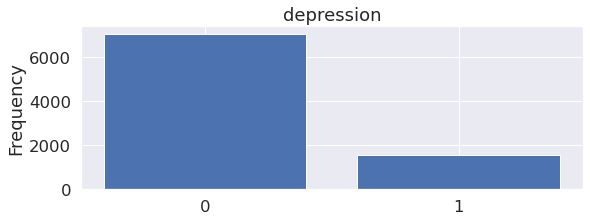

depression: 
 0    7056
1    1554
Name: depression, dtype: int64


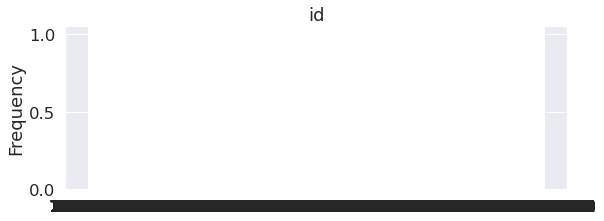

id: 
 384303104     1
1341727385    1
2141745851    1
232991416     1
1508686514    1
             ..
1208268148    1
1362152819    1
656917874     1
243457393     1
1441449983    1
Name: id, Length: 8610, dtype: int64


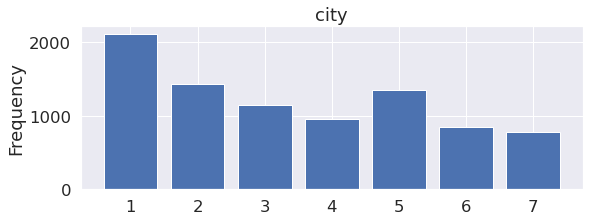

city: 
 1    2110
2    1424
5    1346
3    1151
4     957
6     840
7     782
Name: city, dtype: int64


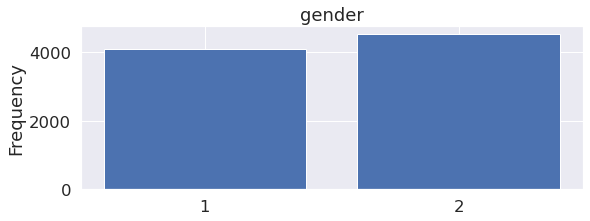

gender: 
 2    4527
1    4083
Name: gender, dtype: int64


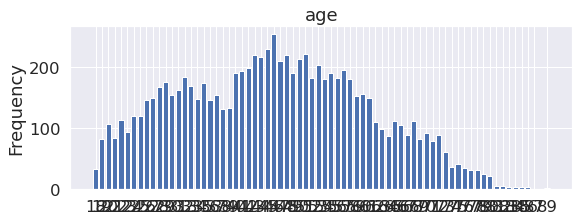

age: 
 46    253
45    228
51    220
48    218
43    218
44    216
50    213
47    209
53    203
42    198
57    194
41    192
40    190
55    190
49    189
32    183
52    182
56    181
54    179
58    179
29    175
35    173
33    169
28    166
31    162
60    156
30    153
37    153
59    152
61    149
27    148
34    147
26    146
36    145
39    133
38    131
25    120
24    119
22    113
68    112
65    111
62    110
20    107
66    105
63     98
23     94
70     91
67     89
72     89
64     87
21     83
19     82
69     82
71     79
73     61
75     41
74     37
76     34
18     33
78     32
77     32
79     25
80     21
81      6
82      6
86      4
85      4
84      4
83      3
89      2
87      1
Name: age, dtype: int64


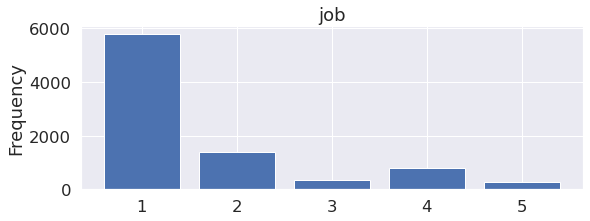

job: 
 1    5794
2    1394
4     813
3     337
5     272
Name: job, dtype: int64


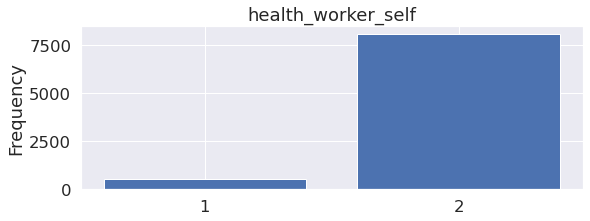

health_worker_self: 
 2    8091
1     519
Name: health_worker_self, dtype: int64


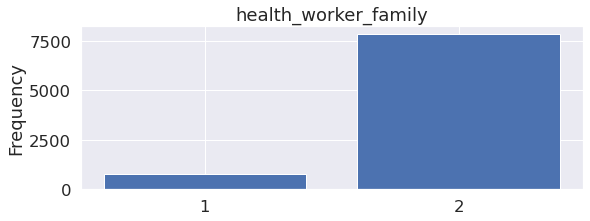

health_worker_family: 
 2    7848
1     762
Name: health_worker_family, dtype: int64


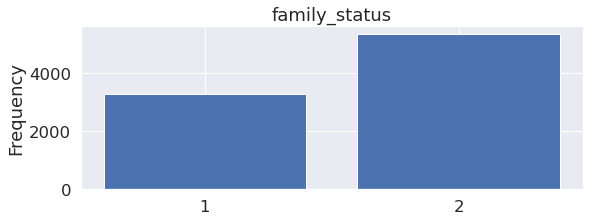

family_status: 
 2    5335
1    3275
Name: family_status, dtype: int64


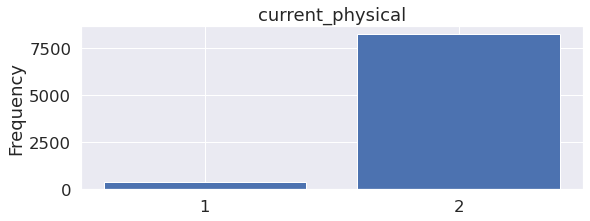

current_physical: 
 2    8234
1     376
Name: current_physical, dtype: int64


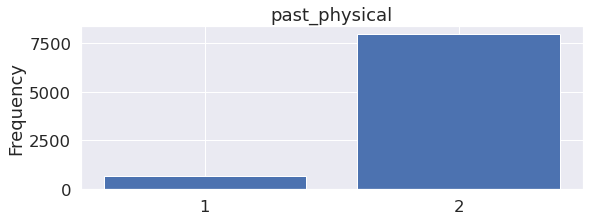

past_physical: 
 2    7951
1     659
Name: past_physical, dtype: int64


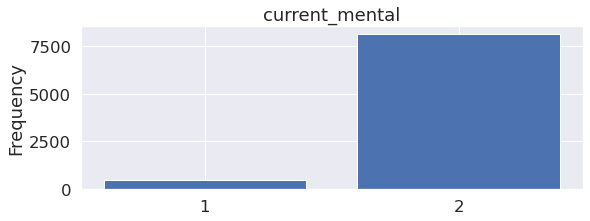

current_mental: 
 2    8118
1     492
Name: current_mental, dtype: int64


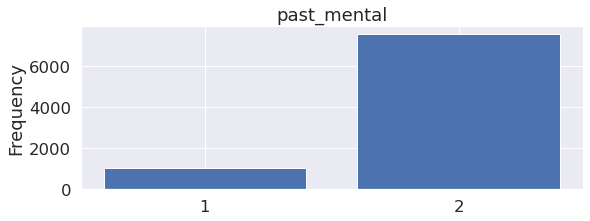

past_mental: 
 2    7572
1    1038
Name: past_mental, dtype: int64


In [71]:
category1 = ["depression","id","city","gender","age","job", "health_worker_self","health_worker_family","family_status","current_physical","past_physical","current_mental","past_mental",]
for c in category1:
    bar_plot(c)

In [72]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

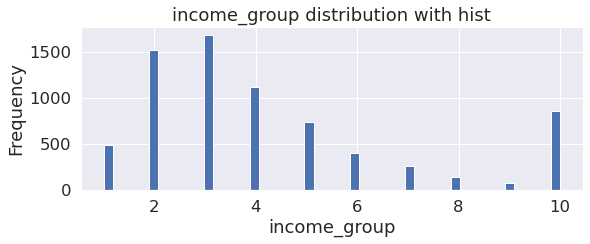

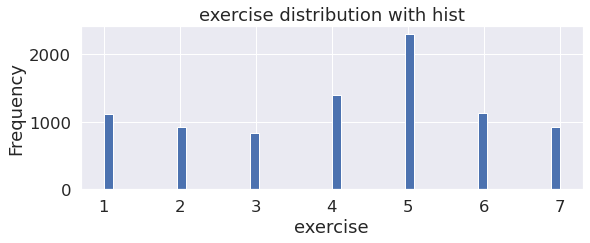

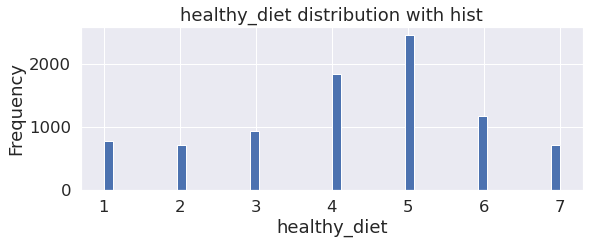

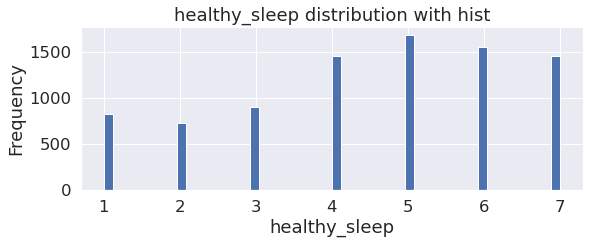

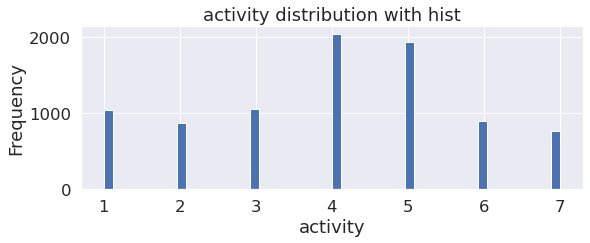

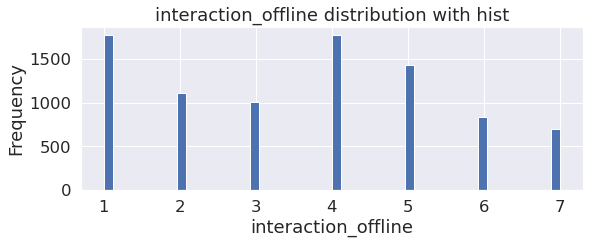

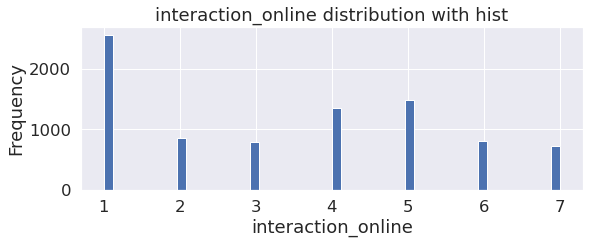

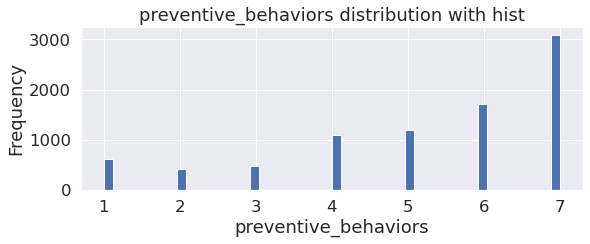

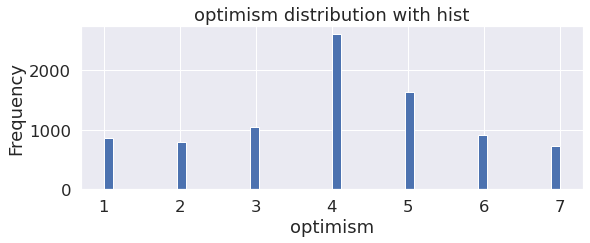

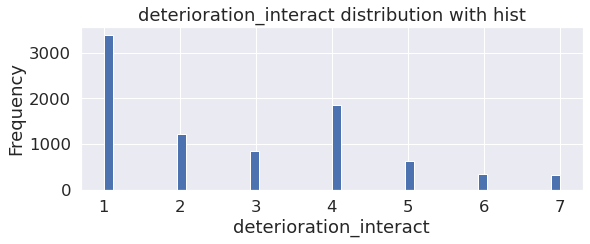

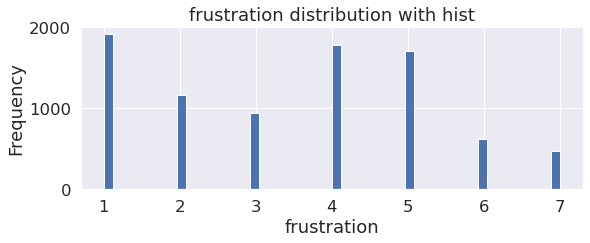

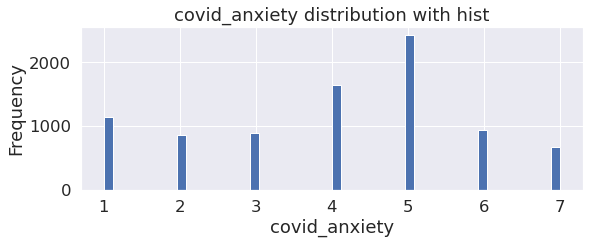

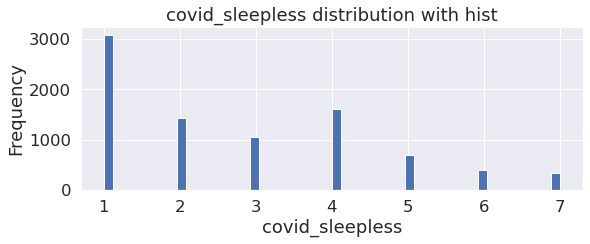

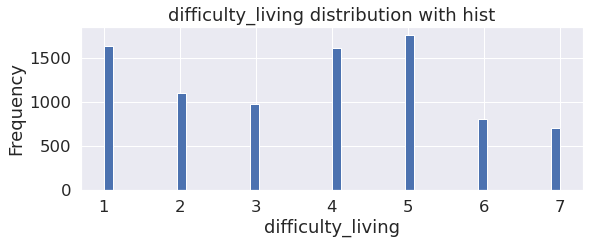

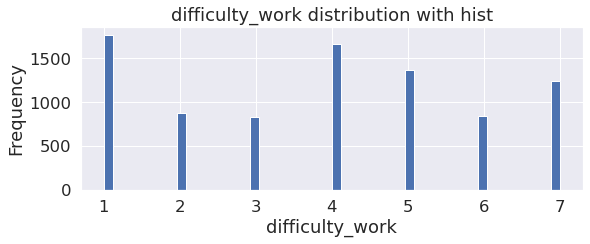

In [73]:
numericVar = ["income_group", "exercise","healthy_diet","healthy_sleep","activity","interaction_offline","interaction_online","preventive_behaviors","optimism","deterioration_interact","frustration","covid_anxiety","covid_sleepless","difficulty_living","difficulty_work"]
for n in numericVar:
    plot_hist(n)

From EDA analysis we come to know that  current mental, past mental, past physical, current physical is heavily unbalanced

# Optimism

Optimism is a normally distrributed data roughly, we can show it by plotting bell curve

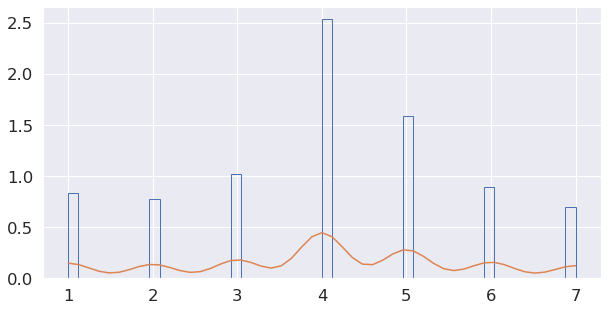

In [74]:
import scipy.stats as stats
plt.figure(figsize=(10,5))

density = stats.gaussian_kde(train["optimism"])
n, x, _ = plt.hist(train["optimism"], bins = 50, histtype = u"step", density = True)
plt.plot(x, density(x))

plt.show()

## Prepare Train, test

In [75]:
#2-ok, #1-not_ok
new_train = pd.DataFrame()
new_train["current_mental"] = train["current_mental"].replace([2,1], ["ok","not_ok"])
new_train["past_mental"] = train["past_mental"].replace([2,1], ["ok","not_ok"])
new_train["past_physical"] = train["past_physical"].replace([2,1], ["ok","not_ok"])
new_train["current_physical"] = train["current_physical"].replace([2,1], ["ok","not_ok"])
new_train["optimism"] = train["optimism"]
new_train["deterioration_interact_binning"]=train["deterioration_interact_binning"]
new_train["frustration_binning"]=train["frustration_binning"]
new_train["difficulty_work_binning"]=train["difficulty_work_binning"]
new_train["difficulty_living_binning"]=train["difficulty_living_binning"]
new_train["deterioration_economy_binning"]=train["deterioration_economy_binning"]
new_train["healthy_sleep_binning"]=train["healthy_sleep_binning"]
new_train["depression"] = train["depression"]
new_train["id"] = train["id"]
new_train.head()

,current_mental,past_mental,past_physical,current_physical,optimism,deterioration_interact_binning,frustration_binning,difficulty_work_binning,difficulty_living_binning,deterioration_economy_binning,healthy_sleep_binning,depression,id
0,ok,ok,not_ok,ok,4,NaN,mid,mid,mid,NaN,mid,0,1963059261
1,ok,ok,ok,ok,4,mid,mid,mid,mid,mid,mid,0,591108995
2,ok,ok,ok,ok,5,NaN,NaN,NaN,NaN,NaN,mid,0,613190420
3,ok,ok,ok,ok,7,NaN,high,NaN,NaN,NaN,mid,0,1011726889
4,ok,ok,ok,ok,5,NaN,NaN,mid,NaN,low,mid,0,345550215


In [76]:
one_hot_encoded_training_predictors = pd.get_dummies(new_train)
one_hot_encoded_training_predictors.head()

,optimism,depression,id,current_mental_not_ok,current_mental_ok,past_mental_not_ok,past_mental_ok,past_physical_not_ok,past_physical_ok,current_physical_not_ok,...,difficulty_work_binning_high,difficulty_living_binning_low,difficulty_living_binning_mid,difficulty_living_binning_high,deterioration_economy_binning_low,deterioration_economy_binning_mid,deterioration_economy_binning_high,healthy_sleep_binning_low,healthy_sleep_binning_mid,healthy_sleep_binning_high
0,4,0,1963059261,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,4,0,591108995,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,5,0,613190420,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1011726889,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,345550215,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [77]:
new_test = pd.DataFrame()
new_test["current_mental"] = test["current_mental"].replace([2,1], ["ok","not_ok"])
new_test["past_mental"] = test["past_mental"].replace([2,1], ["ok","not_ok"])
new_test["past_physical"] = test["past_physical"].replace([2,1], ["ok","not_ok"])
new_test["current_physical"] = test["current_physical"].replace([2,1], ["ok","not_ok"])
new_test["optimism"] = test["optimism"]
new_test["deterioration_interact_binning"]=test["deterioration_interact_binning"]
new_test["frustration_binning"]=test["frustration_binning"]
new_test["difficulty_work_binning"]=test["difficulty_work_binning"]
new_test["difficulty_living_binning"]=test["difficulty_living_binning"]
new_test["deterioration_economy_binning"]=test["deterioration_economy_binning"]
new_test["healthy_sleep_binning"]=test["healthy_sleep_binning"]
new_test["id"] = test["id"]
new_test.head()

,current_mental,past_mental,past_physical,current_physical,optimism,deterioration_interact_binning,frustration_binning,difficulty_work_binning,difficulty_living_binning,deterioration_economy_binning,healthy_sleep_binning,id
0,ok,ok,ok,ok,6,NaN,mid,mid,mid,NaN,mid,828763412
1,ok,ok,ok,ok,5,mid,mid,mid,mid,mid,mid,2009293273
2,ok,ok,ok,ok,7,NaN,NaN,NaN,NaN,NaN,mid,360753013
3,ok,ok,ok,ok,1,NaN,high,NaN,NaN,NaN,mid,321912830
4,ok,not_ok,not_ok,ok,2,NaN,NaN,mid,NaN,low,mid,1090960107


In [78]:
one_hot_encoded_test = pd.get_dummies(new_test)
one_hot_encoded_test.head()

,optimism,id,current_mental_not_ok,current_mental_ok,past_mental_not_ok,past_mental_ok,past_physical_not_ok,past_physical_ok,current_physical_not_ok,current_physical_ok,...,difficulty_work_binning_high,difficulty_living_binning_low,difficulty_living_binning_mid,difficulty_living_binning_high,deterioration_economy_binning_low,deterioration_economy_binning_mid,deterioration_economy_binning_high,healthy_sleep_binning_low,healthy_sleep_binning_mid,healthy_sleep_binning_high
0,6,828763412,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,5,2009293273,0,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
2,7,360753013,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,321912830,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2,1090960107,0,1,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


# Imbalance Handle

## Undersample

In [79]:
# for undersampling we need a portion of majority class and will take whole data of minority class
# count fraud transaction is the total number of fraud transaction
# now lets us see the index of fraud cases
ok_indices= np.array(new_train[new_train.current_mental=="ok"].index)
not_ok_indices = np.array(new_train[new_train.current_mental=="not_ok"].index)
#print(len(ok_indices))
Count_not_ok_indices = len(not_ok_indices)
#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data
def undersample(ok_indices,not_ok_indices,times):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(ok_indices,(times*Count_not_ok_indices),replace=False))
    undersample_data= np.concatenate([not_ok_indices,ok_indices])
    undersample_data = train.iloc[undersample_data,:]
    
    print("the ok proportion is :",len(undersample_data[train.current_mental=="ok"])/len(undersample_data))
    print("the not_ok proportion is :",len(undersample_data[train.current_mental=="not_ok"])/len(undersample_data))
    print("total number of record in resampled data is:",len(undersample_data))
    return(undersample_data)

In [80]:
X_trainTest = one_hot_encoded_training_predictors.drop(columns = "depression")
Y_trainTest = one_hot_encoded_training_predictors["depression"]
X_testTest = one_hot_encoded_test
X_trainTest.head()

,optimism,id,current_mental_not_ok,current_mental_ok,past_mental_not_ok,past_mental_ok,past_physical_not_ok,past_physical_ok,current_physical_not_ok,current_physical_ok,...,difficulty_work_binning_high,difficulty_living_binning_low,difficulty_living_binning_mid,difficulty_living_binning_high,deterioration_economy_binning_low,deterioration_economy_binning_mid,deterioration_economy_binning_high,healthy_sleep_binning_low,healthy_sleep_binning_mid,healthy_sleep_binning_high
0,4,1963059261,0,1,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,4,591108995,0,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
2,5,613190420,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,7,1011726889,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5,345550215,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


## Resample

In [81]:
from sklearn.utils import resample

In [82]:
# separate minority and majority classes
not_fraud = new_train[new_train.current_mental=="ok"]
fraud = new_train[new_train.current_mental=="not_ok"]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.current_mental.value_counts()

ok        8118
not_ok    8118
Name: current_mental, dtype: int64

## Handling positively skewed data

In [83]:
#https://www.kaggle.com/getting-started/110134
arr = train["deterioration_interact"]
arr = np.array(arr)

sqrt_arr = np.sqrt(arr)
train["deterioration_interact_sqrt"] = sqrt_arr

cbrt_arr = np.cbrt(arr)
train["deterioration_interact_cbrt"] = cbrt_arr

log_arr = np.log(arr)
train["deterioration_interact_log"] = log_arr

In [84]:
train.head()
print(train.shape)

(8610, 48)


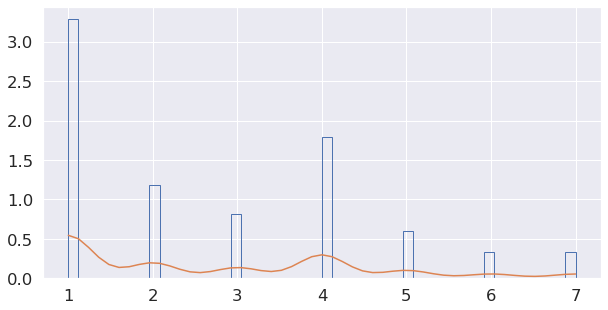

In [85]:
import scipy.stats as stats
plt.figure(figsize=(10,5))

density = stats.gaussian_kde(train["deterioration_interact"])
n, x, _ = plt.hist(train["deterioration_interact"], bins = 50, histtype = u"step", density = True)
plt.plot(x, density(x))

plt.show()

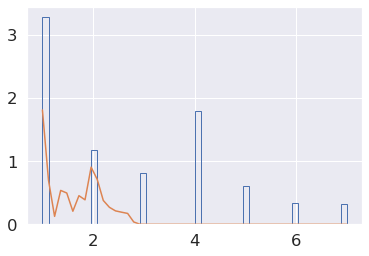

In [86]:
density = stats.gaussian_kde(train["deterioration_interact_sqrt"])
n, x, _ = plt.hist(train["deterioration_interact"], bins = 50, histtype = u"step", density = True)
plt.plot(x, density(x))

plt.show()

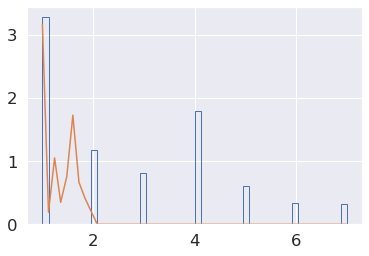

In [87]:
density = stats.gaussian_kde(train["deterioration_interact_cbrt"])
n, x, _ = plt.hist(train["deterioration_interact"], bins = 50, histtype = u"step", density = True)
plt.plot(x, density(x))

plt.show()

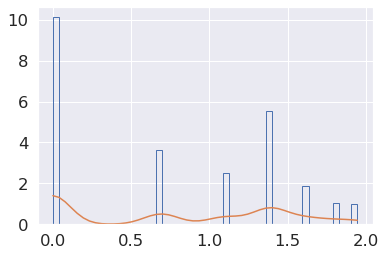

In [88]:
density = stats.gaussian_kde(train["deterioration_interact_log"])
n, x, _ = plt.hist(train["deterioration_interact_log"], bins = 50, histtype = u"step", density = True)
plt.plot(x, density(x))

plt.show()

Our initial assumption to thing it to be a positively skewed data and to fix it failed

# The Findings

0.7623910805193814 current mental
0.7645563616603427 past mental
FAIL

We consider current mental, past mental, past physical, current physical, optimism, deterioration interact, frustration, difficulty_work, difficulty_living, deteriation, healthy_sleep, age to be important feature by seeing the correlation score

current mental, past mental, past physical, current physical = categorical heaviliy imbalanced
optimism, deterioration interact, frustration, difficulty_work, difficulty_living, deteriation, healthy_sleep, age = continuous data unequality in it

We wanted to appy undersample, resample function for the cagegorical feature as per importance of the feature
Standard Z test for handling the iniquality of the data

We also found current_mental and past_mental having the highest correlation, so we wanted to omitt one feature
applying logisticRegression we find
when both features are there - auc score - 0.77
when only current mental is there - auc score - 0.7623910805193814
when only past mental is there - auc score - 0.7645563616603427

We further planned on see the feature importance by applying RandomForest().feature_importance_ function